<a href="https://colab.research.google.com/github/aminufolashade/Folashade_Portfolio/blob/main/Analysis_on_Global_Migration_Death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load relevant libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Load Dataset
Gmigrant = pd.read_csv('migrant.csv')
Gmigrant.head(3)

,Incident Type,Incident year,Reported Month,Month Number,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,1,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US to Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,1,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US to Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,1,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US to Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America


In [ ]:
# Display Number of Rows and Columns of the Dataset
Gmigrant.shape

(13020, 20)

In [ ]:
Gmigrant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Incident Type                        13020 non-null  object 
 1   Incident year                        13020 non-null  int64  
 2   Reported Month                       13020 non-null  object 
 3   Month Number                         13020 non-null  int64  
 4   Region of Origin                     12998 non-null  object 
 5   Region of Incident                   13020 non-null  object 
 6   Country of Origin                    13012 non-null  object 
 7   Number of Dead                       12470 non-null  float64
 8   Minimum Estimated Number of Missing  13020 non-null  int64  
 9   Total Number of Dead and Missing     13020 non-null  int64  
 10  Number of Survivors                  13020 non-null  int64  
 11  Number of Females           

In [ ]:
Gmigrant.nunique()

Incident Type                             4
Incident year                            10
Reported Month                           12
Month Number                             12
Region of Origin                         33
Region of Incident                       16
Country of Origin                       335
Number of Dead                           86
Minimum Estimated Number of Missing     120
Total Number of Dead and Missing        137
Number of Survivors                     228
Number of Females                        48
Number of Males                          59
Number of Children                       20
Cause of Death                           13
Migration route                          24
Location of death                      7460
Information Source                     3803
Coordinates                            9583
UNSD Geographical Grouping               19
dtype: int64

In [ ]:
# Checking number of null values in each variables
Gmigrant.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Month Number                              0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                               0
UNSD Geographical Grouping                1
dtype: int64

## **Handling Missing Values**

For **Number of Dead** column there are 550 missing values and its quite high. I need to check the first 5 rows of the column if there are no other missing values there, then we can assign 'zero' to fill the missing values.

**Migration Route** has 3021 missing values. We'll check the 1st five rows to decide and if there are no other missing values in it, we assign 'Unknown' to the missing values.

In [ ]:
# Display 1st 3 rows of 'Region of Origin' variable with Null values
Gmigrant[Gmigrant['Region of Origin'].isnull()].head(3)

,Incident Type,Incident year,Reported Month,Month Number,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
154,Incident,2016,January,1,NaN,Mediterranean,"Afghanistan,Iraq,Syrian Arab Republic",39.0,0,39,75,0,0,5,Drowning,Eastern Mediterranean,"between Ayvacik, Canakkale, Türkiye and Lesvos...",Turkish Coast Guard via IOM Athens. AFP and th...,"39.2893824, 26.4734281",Uncategorized
1031,Incident,2023,January,1,NaN,Northern Africa,Sudan,1.0,0,1,0,0,1,0,Sickness,Sahara Desert crossing,"Al-Jawf, AlKufra, Libya",IOM Libya Displacement Tracking Matrix,"24.22092653, 23.291791",Northern Africa
1032,Incident,2023,January,1,NaN,Northern Africa,Egypt,1.0,0,1,0,0,1,0,Violence,Sahara Desert crossing,"Qondofah, Benghazi, Libya",IOM Libya Displacement Tracking Matrix,"32.029039, 20.016156",Northern Africa


In [ ]:
# Display 1st 3 rows of 'Migration route' variable with Null values
Gmigrant[Gmigrant['Migration route'].isnull()].head(3)

,Incident Type,Incident year,Reported Month,Month Number,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
4,Incident,2014,January,1,Northern Africa,Europe,Sudan,1.0,0,1,2,0,1,0,Harsh environmental conditions,NaN,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",Northern Europe
17,Incident,2015,January,1,Eastern Africa,Eastern Africa,Ethiopia,1.0,0,1,1,0,0,0,Violence,NaN,Ethiopian-Djibouti border,Mixed Migration Monitoring Mechanism Initative...,"11.886603, 41.998129",Eastern Africa
18,Incident,2015,January,1,Eastern Africa,Eastern Africa,Somalia,2.0,0,2,0,0,0,0,Harsh environmental conditions,NaN,"Obock, Djibouti",Mixed Migration Monitoring Mechanism Initative...,"11.9647465, 43.288407",Eastern Africa


In [ ]:
# Fill missing values in 'Region of Origin' and 'Migration route' variables with 'Unkown'
Gmigrant['Region of Origin'].fillna('Unknown', inplace=True)
Gmigrant['Migration route'].fillna('Unknown', inplace=True)
Gmigrant['UNSD Geographical Grouping'].fillna('Unknown', inplace=True)
Gmigrant['Information Source'].fillna('Unknown', inplace=True)

In [ ]:
# Display 1st 3 rows of 'Number of Dead' variable with Null values
Gmigrant[Gmigrant['Number of Dead'].isnull()].head(3)

,Incident Type,Incident year,Reported Month,Month Number,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
68,Incident,2016,January,1,Eastern Africa,Eastern Africa,"Ethiopia,Somalia",NaN,36,36,70,0,0,0,Drowning,Horn of Africa to Yemen crossing,Off the coast of Somaliland autonomous region ...,IOM Somalia,"10.8362539, 45.6400791",Eastern Africa
259,Incident,2017,January,1,South America,North America,Ecuador,NaN,1,1,0,0,1,0,Drowning,US to Mexico border crossing,"Unspecified location in Río Bravo, US-Mexico b...","1800Migrante, El Comercio","27.60315357, -99.58366425",Northern America
283,Incident,2017,January,1,Sub-Saharan Africa (P),Mediterranean,Unknown,NaN,3,3,11,0,0,0,Drowning,Western Mediterranean,"Gibraltar Strait, 16 miles away from Cabo de G...",El Mundo,"36.7464316, -2.1720646",Uncategorized


In [ ]:
# Fill missing values in 'Number of Dead' variable with '0'
Gmigrant['Number of Dead'].fillna(0, inplace=True)
Gmigrant['Coordinates'].fillna(0, inplace=True)

In [ ]:
# Checking number of null values in each variables
Gmigrant.isnull().sum()

Incident Type                          0
Incident year                          0
Reported Month                         0
Month Number                           0
Region of Origin                       0
Region of Incident                     0
Country of Origin                      8
Number of Dead                         0
Minimum Estimated Number of Missing    0
Total Number of Dead and Missing       0
Number of Survivors                    0
Number of Females                      0
Number of Males                        0
Number of Children                     0
Cause of Death                         0
Migration route                        0
Location of death                      0
Information Source                     0
Coordinates                            0
UNSD Geographical Grouping             0
dtype: int64

In [ ]:
# Display Variable names of the Dataset
Gmigrant.columns

Index(['Incident Type', 'Incident year', 'Reported Month', 'Month Number',
       'Region of Origin', 'Region of Incident', 'Country of Origin',
       'Number of Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Migration route', 'Location of death',
       'Information Source', 'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

In [ ]:
# Renaming the column header for consistency
Gmigrant.rename(columns={'Incident year':'Incident Year','Migration route':'Migration Route', 'Location of death':'Location of Death'}, inplace=True)

In [ ]:
Gmigrant.head(1)

,Incident Type,Incident Year,Reported Month,Month Number,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration Route,Location of Death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,1,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US to Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America


## **Exploratory Data Analysis (EDA)**
Exploratory data analysis is the vital procedure of doing first investigations on data to find patterns and test hypotheses with the aid of summary statistics and graphical representations.

**Statistics Summaries** is used to check data entry errors, outliers, and the distribution of the data, such as whether it is regularly distributed or skewed to the left or right. It contains information like count, mean, standard deviation, median, mode, minimum and maximum values, range, and standard deviation, among other things.

In [ ]:
Gmigrant.describe()

,Incident Year,Month Number,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,2019.060753,6.670814,2.512903,1.904378,4.417281,6.553763,0.458372,1.116052,0.238095
std,2.418738,3.367488,9.535075,15.645297,19.950630,42.315444,2.853658,3.811134,2.417196
min,2014.000000,1.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2021.000000,10.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,12.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000


From the statistics summary, we can infer the below findings :

- Years range from 2014- 2023.
- On average, Number of dead global missing migrant are 2.51. The range shows a slighly huge difference between min and max shows 750 dead migrant.
- It looks like Total Number of Dead and Missing and Number of Survivors have outliers, and the data is right-skewed.

In [ ]:
# Drop Month Name column I created in Excel
Gmigrant.drop(['Month Number'], axis=1, inplace=True)

In [ ]:
Gmigrant['Reported Month']

0         January
1         January
2         January
3         January
4         January
           ...   
13015    December
13016    December
13017    December
13018    December
13019    December
Name: Reported Month, Length: 13020, dtype: object

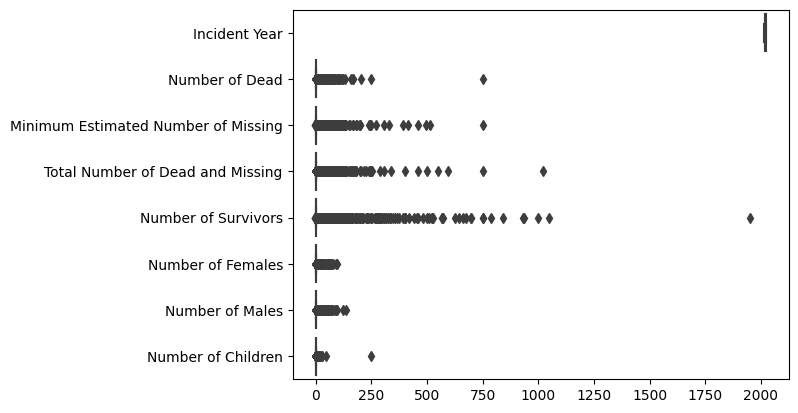

In [ ]:
# plotting box plot
# using the orient parameter for orientation of each numeric variable
sns.boxplot(data = Gmigrant, orient="h")

# display
plt.show()

**Separating Numerical and categorical variables for easy analysis before EDA**

In [ ]:
category_cols = Gmigrant.select_dtypes(include=['object']).columns
numeric_cols = Gmigrant.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_cols)
print("Numerical Variables:")
print(numeric_cols)

Categorical Variables:
Index(['Incident Type', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Cause of Death',
       'Migration Route', 'Location of Death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')
Numerical Variables:
['Incident Year', 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']


- Univariate analysis can be done for both Categorical and Numerical variables.

- Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

- Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Incident Year
Skew : -0.21


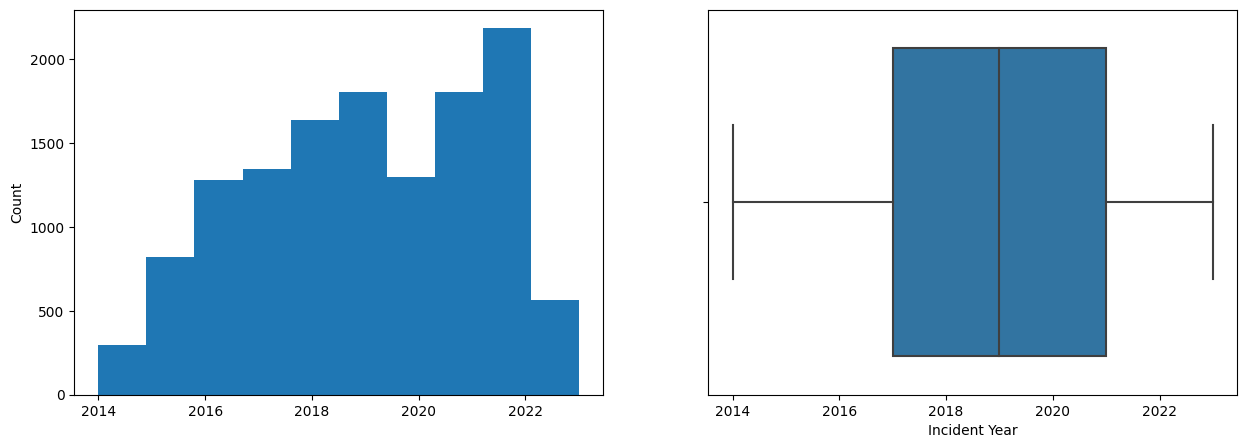

Number of Dead
Skew : 42.55


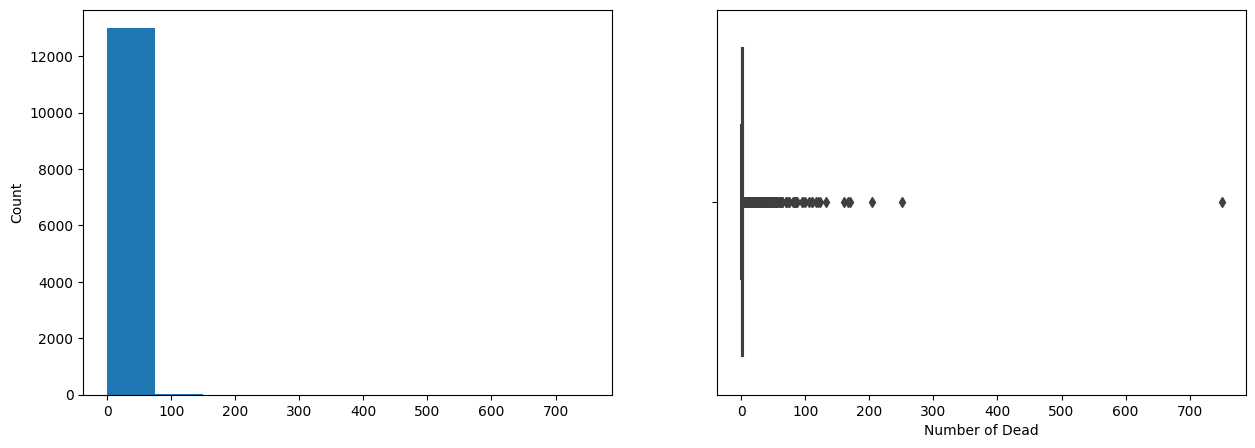

Minimum Estimated Number of Missing
Skew : 22.9


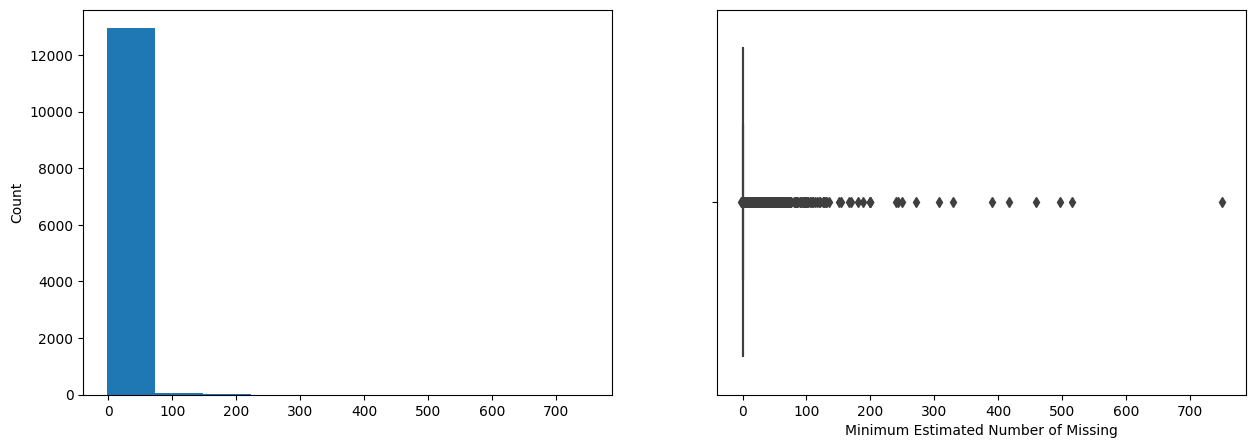

Total Number of Dead and Missing
Skew : 23.7


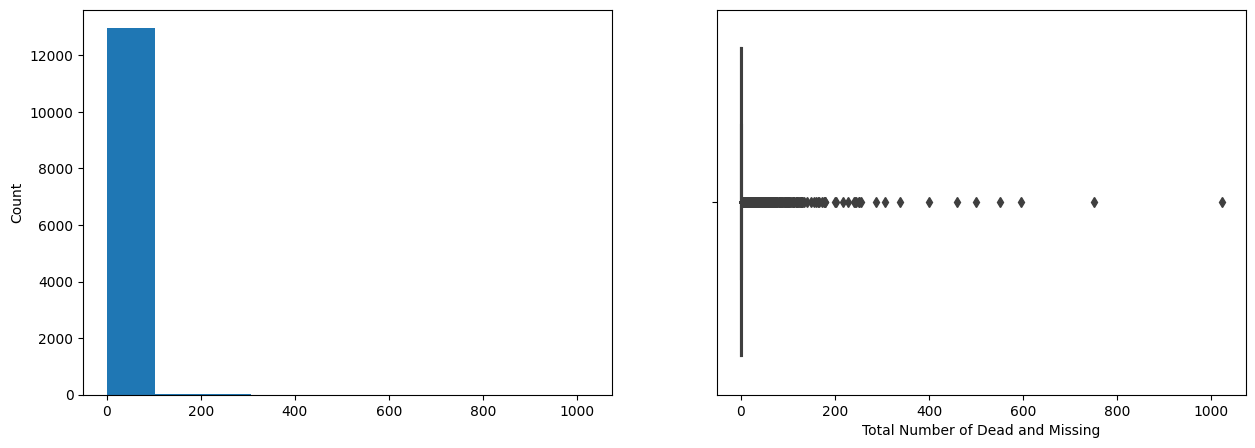

Number of Survivors
Skew : 18.07


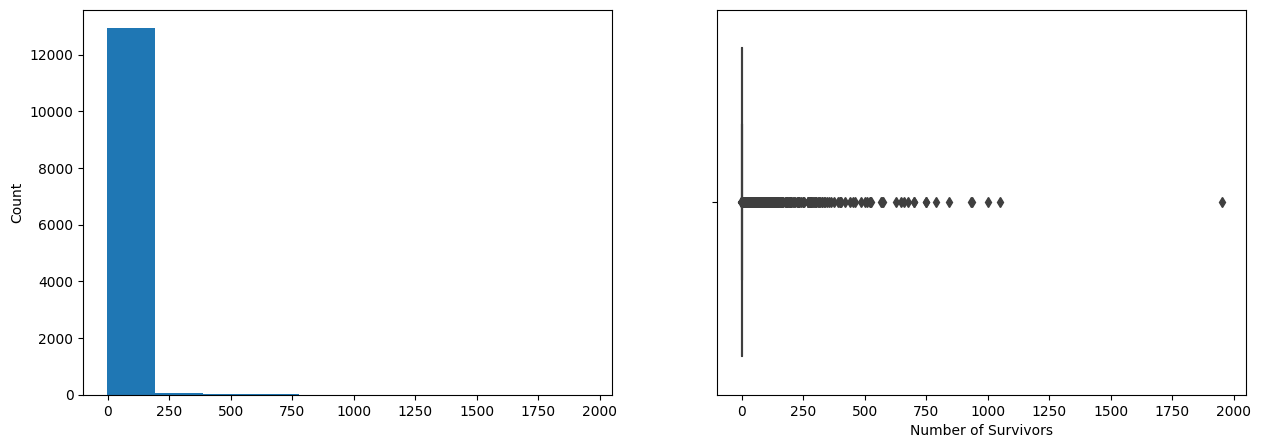

Number of Females
Skew : 17.84


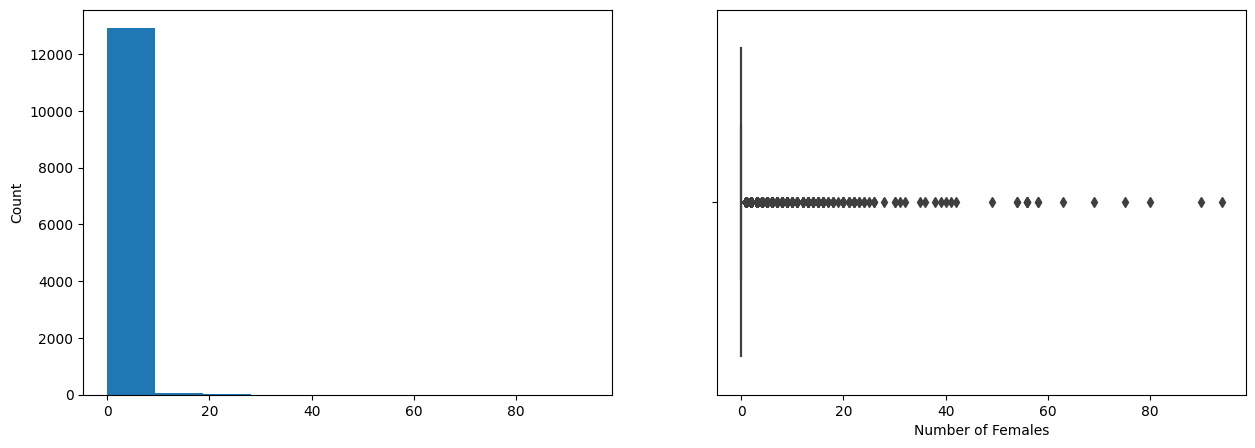

Number of Males
Skew : 16.59


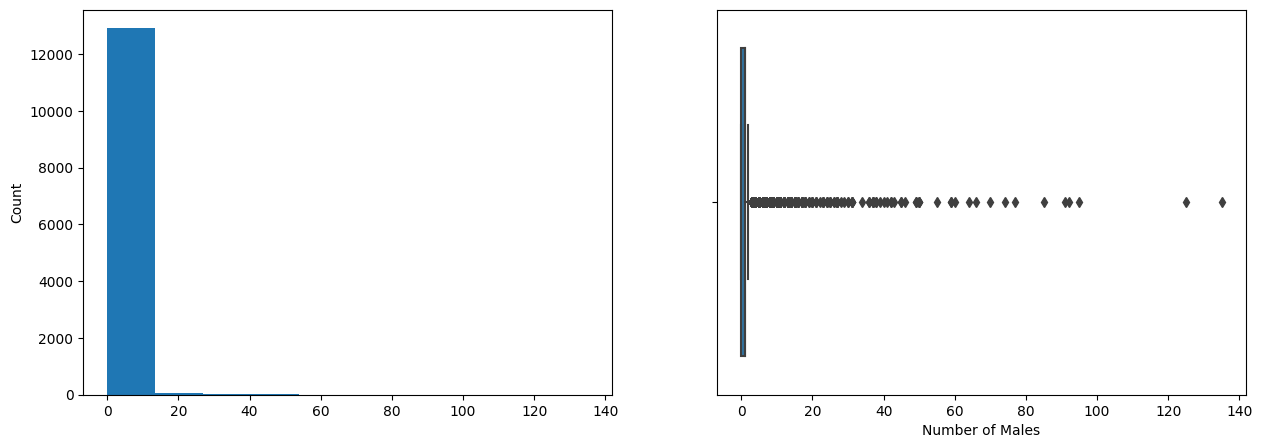

Number of Children
Skew : 85.98


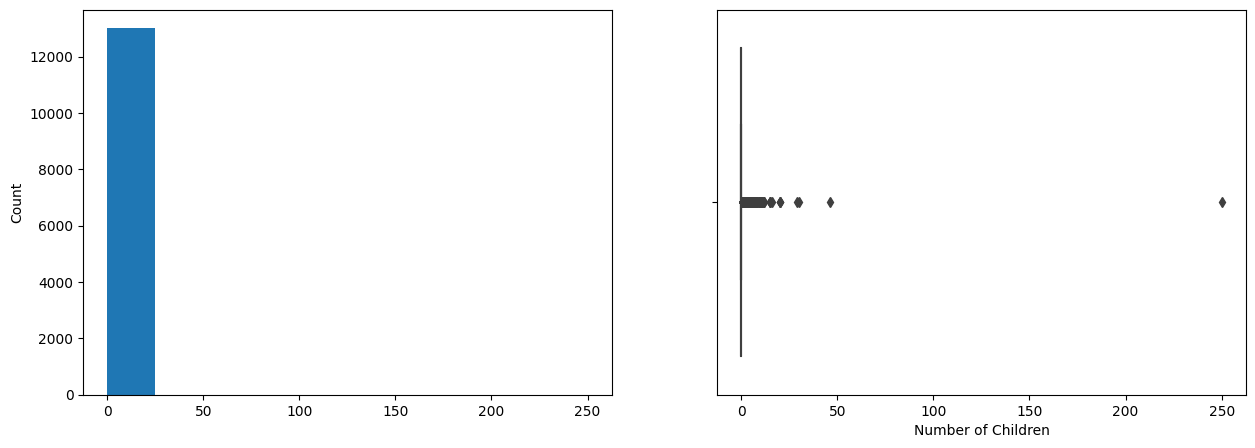

In [ ]:
# Histogram and Box plot of all Numerical Variables with their skewness
for col in numeric_cols:
    print(col)
    print('Skew :', round(Gmigrant[col].skew(), 2))
    plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    Gmigrant[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Gmigrant[col])
    plt.show()

For **categorical variables**, a count plot is used for the visualization. Categorical variables provide the pattern of factors influencing missing migrants.

In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [ ]:
category_cols = Gmigrant.select_dtypes(include=['object']).columns
numeric_cols = Gmigrant.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_cols)
print("Numerical Variables:")
print(numeric_cols)

Categorical Variables:
Index(['Incident Type', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Cause of Death',
       'Migration Route', 'Location of Death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')
Numerical Variables:
['Incident Year', 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']


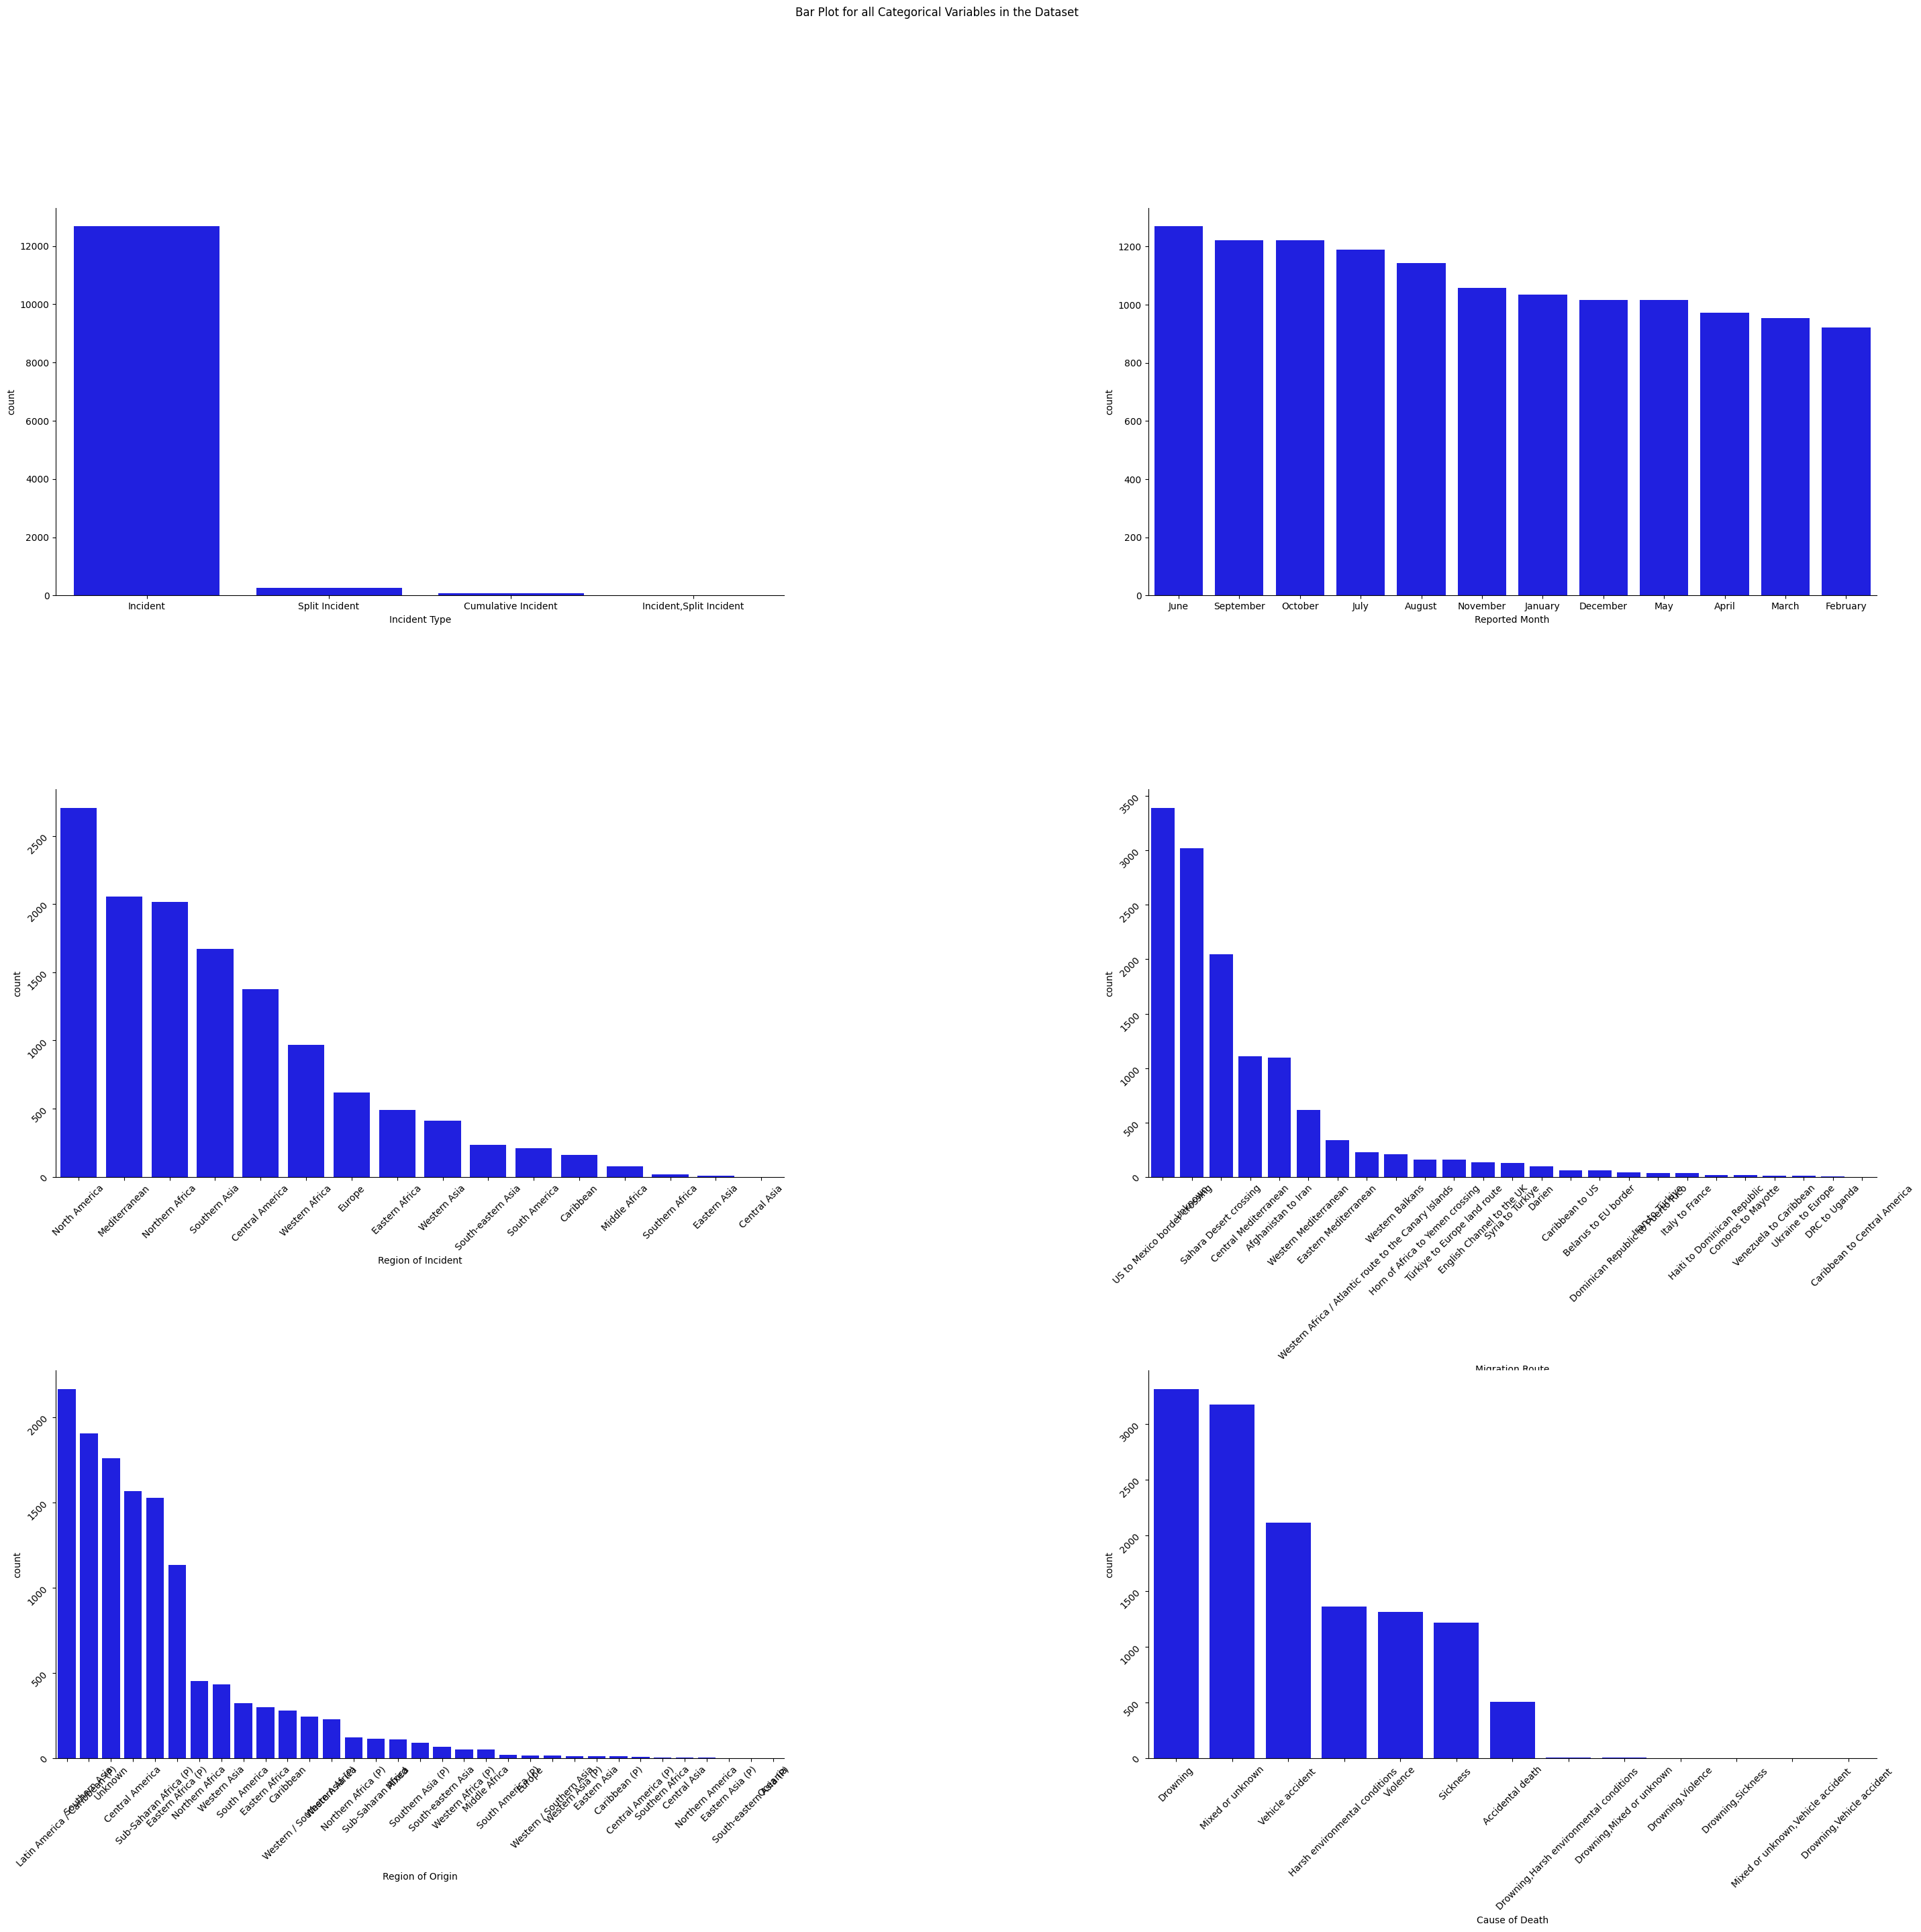

In [ ]:
fig, axes = plt.subplots(3, 2, figsize = (35, 30))
fig.suptitle('Bar Plot for all Categorical Variables in the Dataset')
sns.countplot(ax = axes[0, 0], x = 'Incident Type', data = Gmigrant, color = 'blue',
              order = Gmigrant['Incident Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Reported Month', data = Gmigrant, color = 'blue',
              order = Gmigrant['Reported Month'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Region of Incident', data = Gmigrant, color = 'blue',
              order = Gmigrant['Region of Incident'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Migration Route', data = Gmigrant, color = 'blue',
              order = Gmigrant['Migration Route'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Region of Origin', data = Gmigrant, color = 'blue',
              order = Gmigrant['Region of Origin'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Cause of Death', data = Gmigrant, color = 'blue',
              order = Gmigrant['Cause of Death'].value_counts().index);
axes[1][0].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=45);
axes[2][1].tick_params(labelrotation=45);

plt.subplots_adjust(hspace=.5)
plt.subplots_adjust(wspace=.5)
sns.despine()

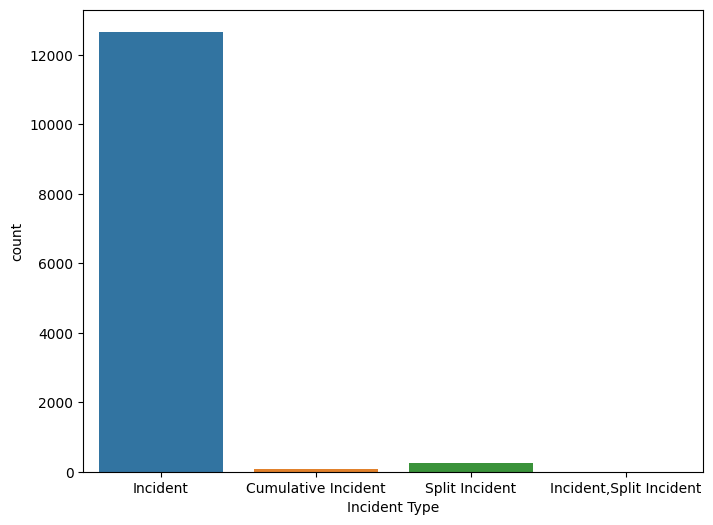

In [ ]:
# count plot on Incident Type categorical variable
fig, axes = plt.subplots(1, figsize = (8, 6))
sns.countplot(x ='Incident Type', data = Gmigrant)

# Show the plot
plt.show()

## **EDA Bivariate Analysis**
Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. If the output variable is continuous, Bar plots can be used. In this analysis, a pair plot is used to show the relationship between two Categorical variables.

<Figure size 1300x1700 with 0 Axes>

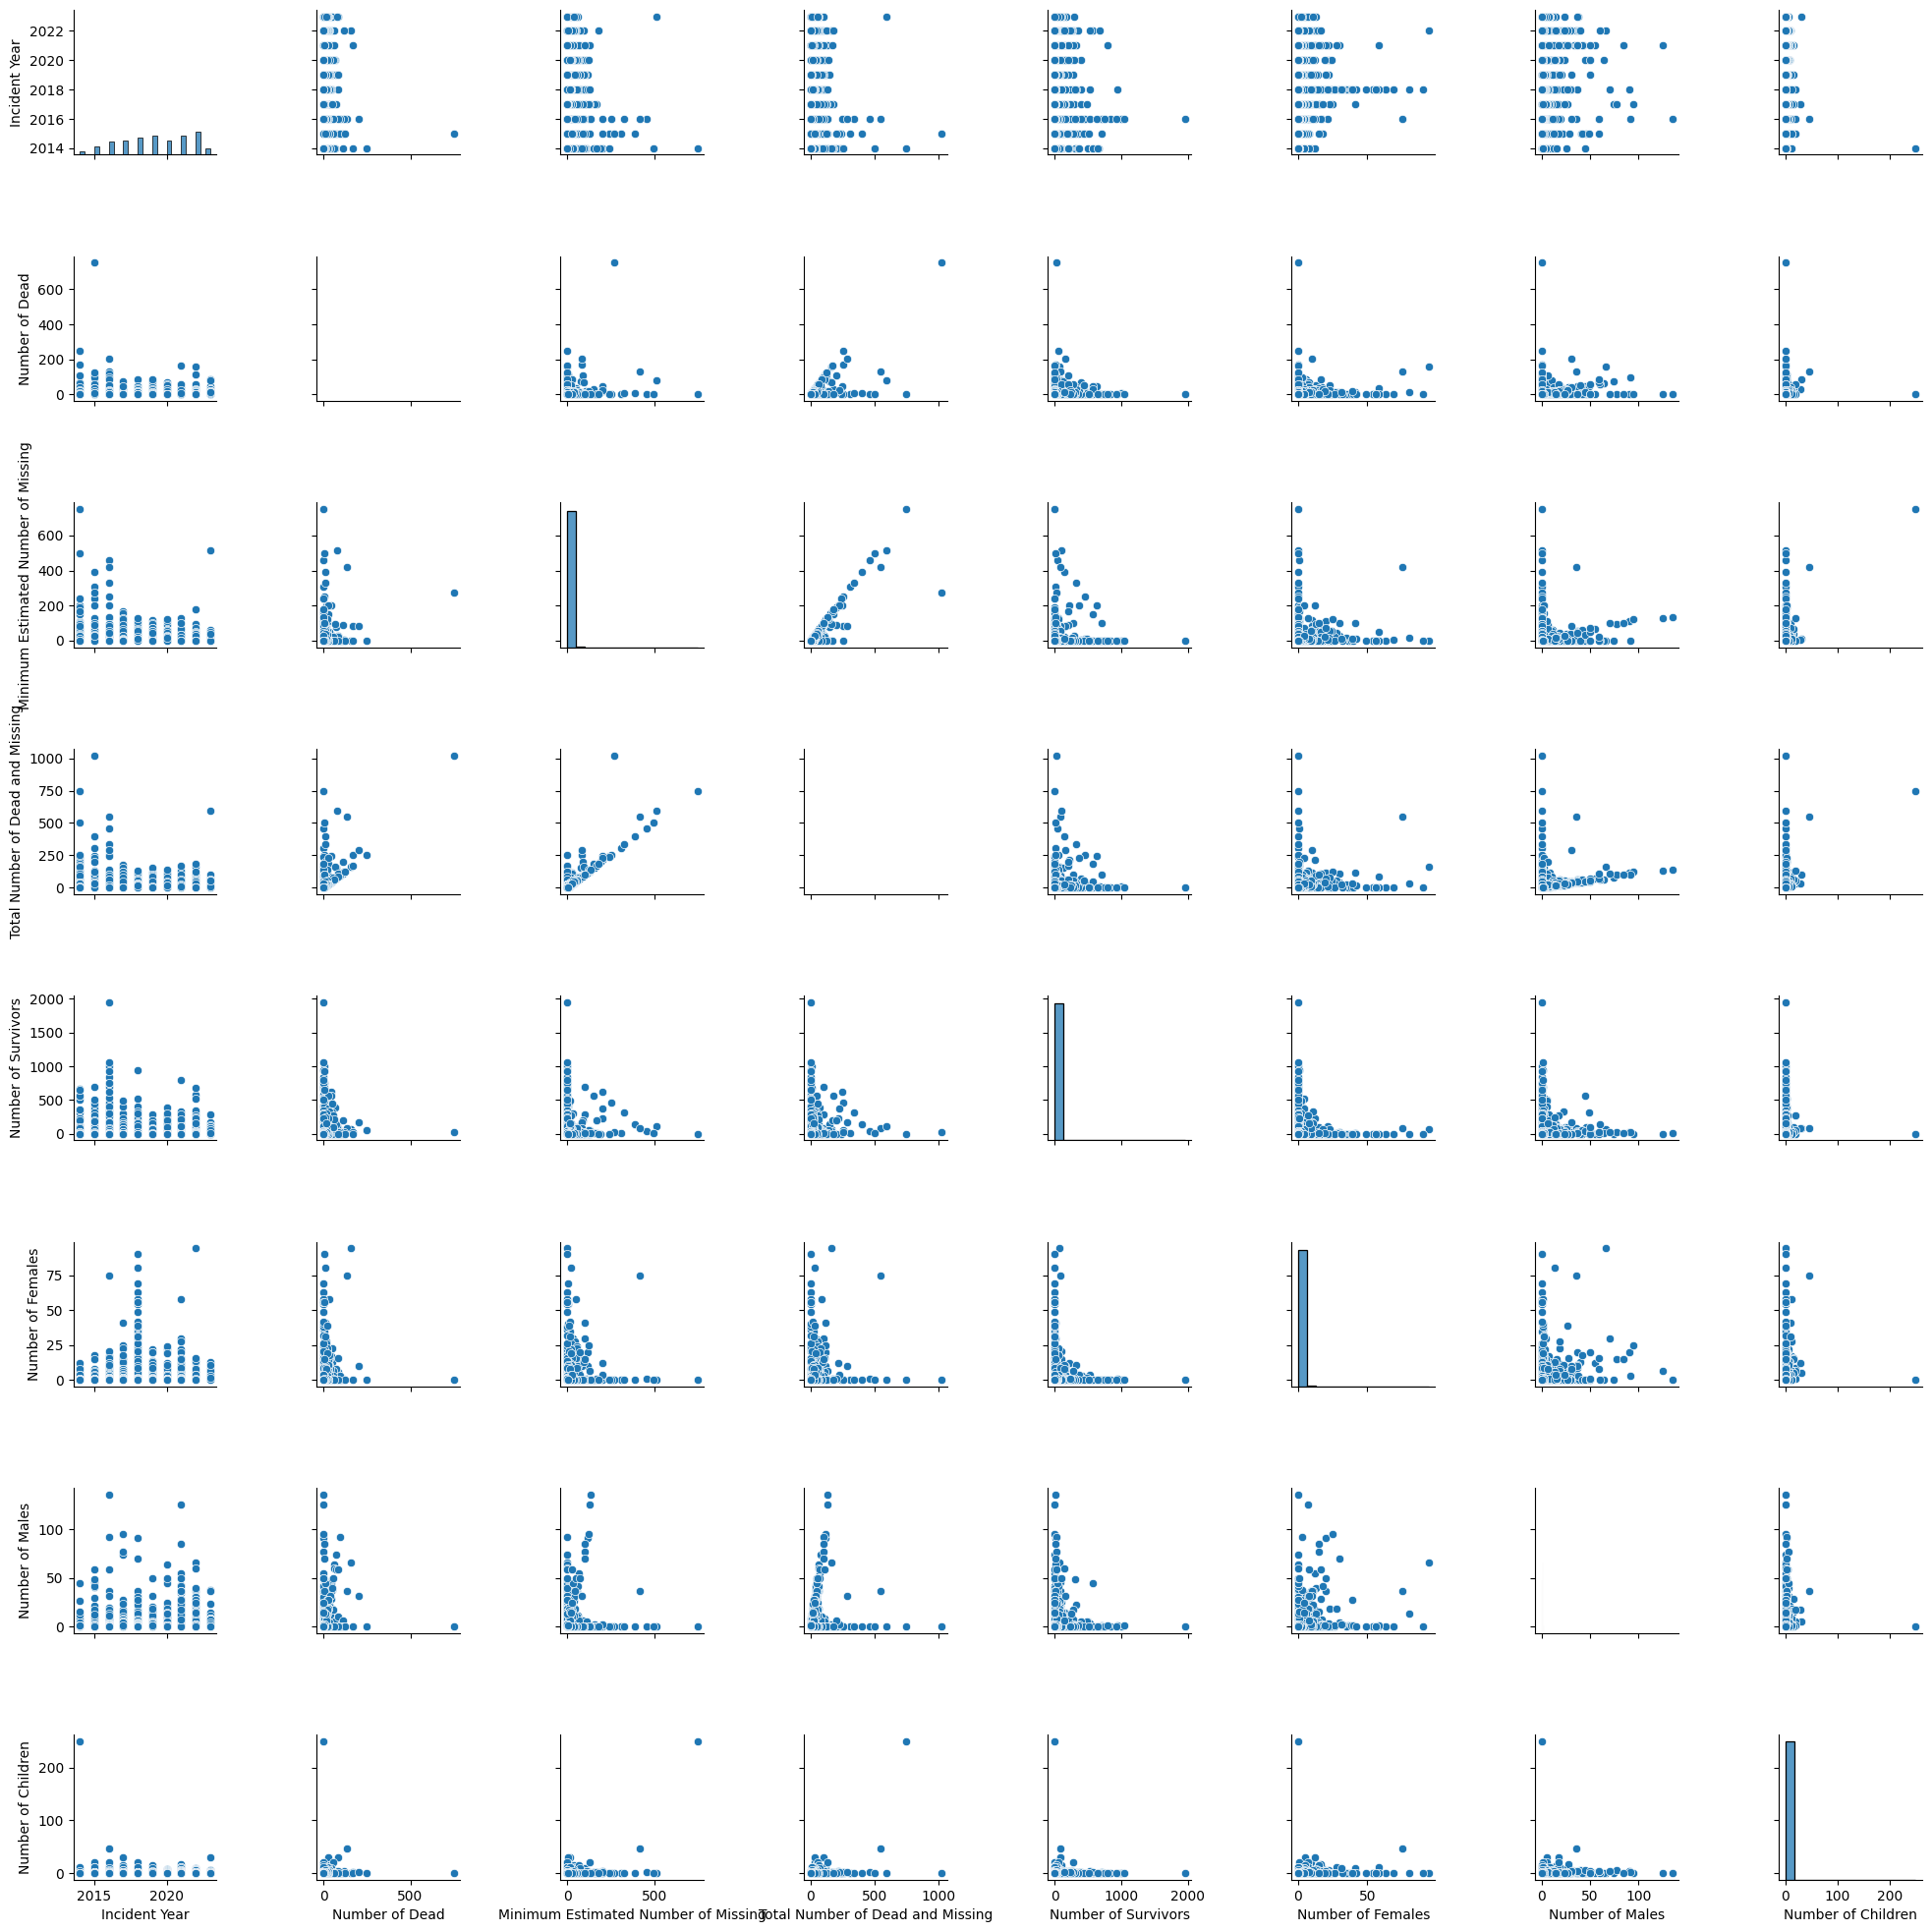

In [ ]:
plt.figure(figsize=(13,17))
sns.pairplot(data=Gmigrant.drop(['Location of Death'],axis=1))

plt.subplots_adjust(hspace=.7)
plt.subplots_adjust(wspace=.7)
sns.despine()
plt.show()

Pair Plot provides below insights:
- Total Number of dead and missing has a positive correlation with the minimum estimated number of missing migrant

A **bar plot** can be used to show the relationship between Categorical variables and continuous variables.

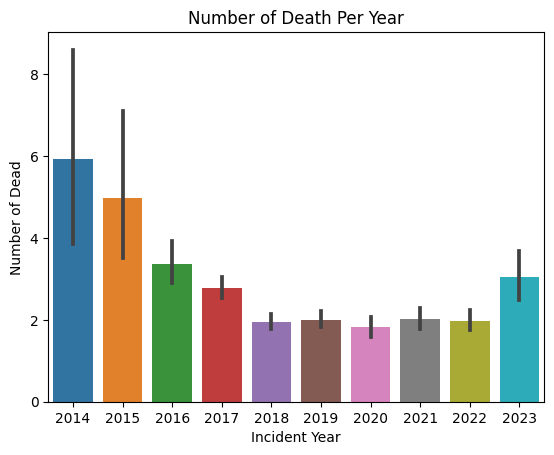

In [ ]:
sns.barplot(data= Gmigrant, x='Incident Year',y= 'Number of Dead')
plt.title('Number of Death Per Year');

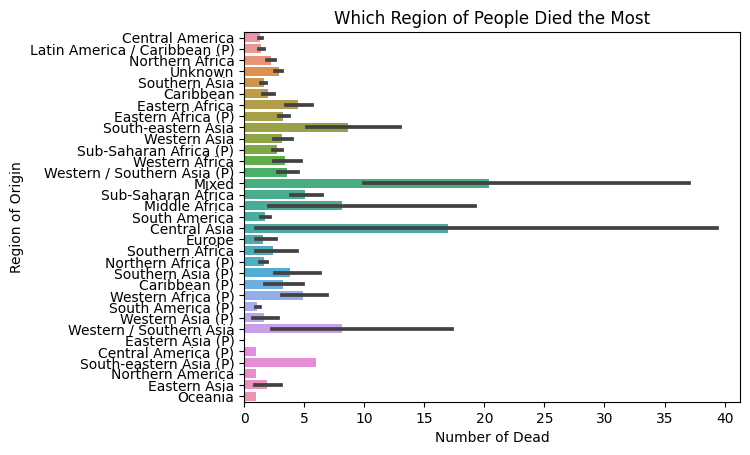

In [ ]:
sns.barplot(data= Gmigrant, x='Number of Dead',y= 'Region of Origin')
plt.title('Which Region of People Died the Most');

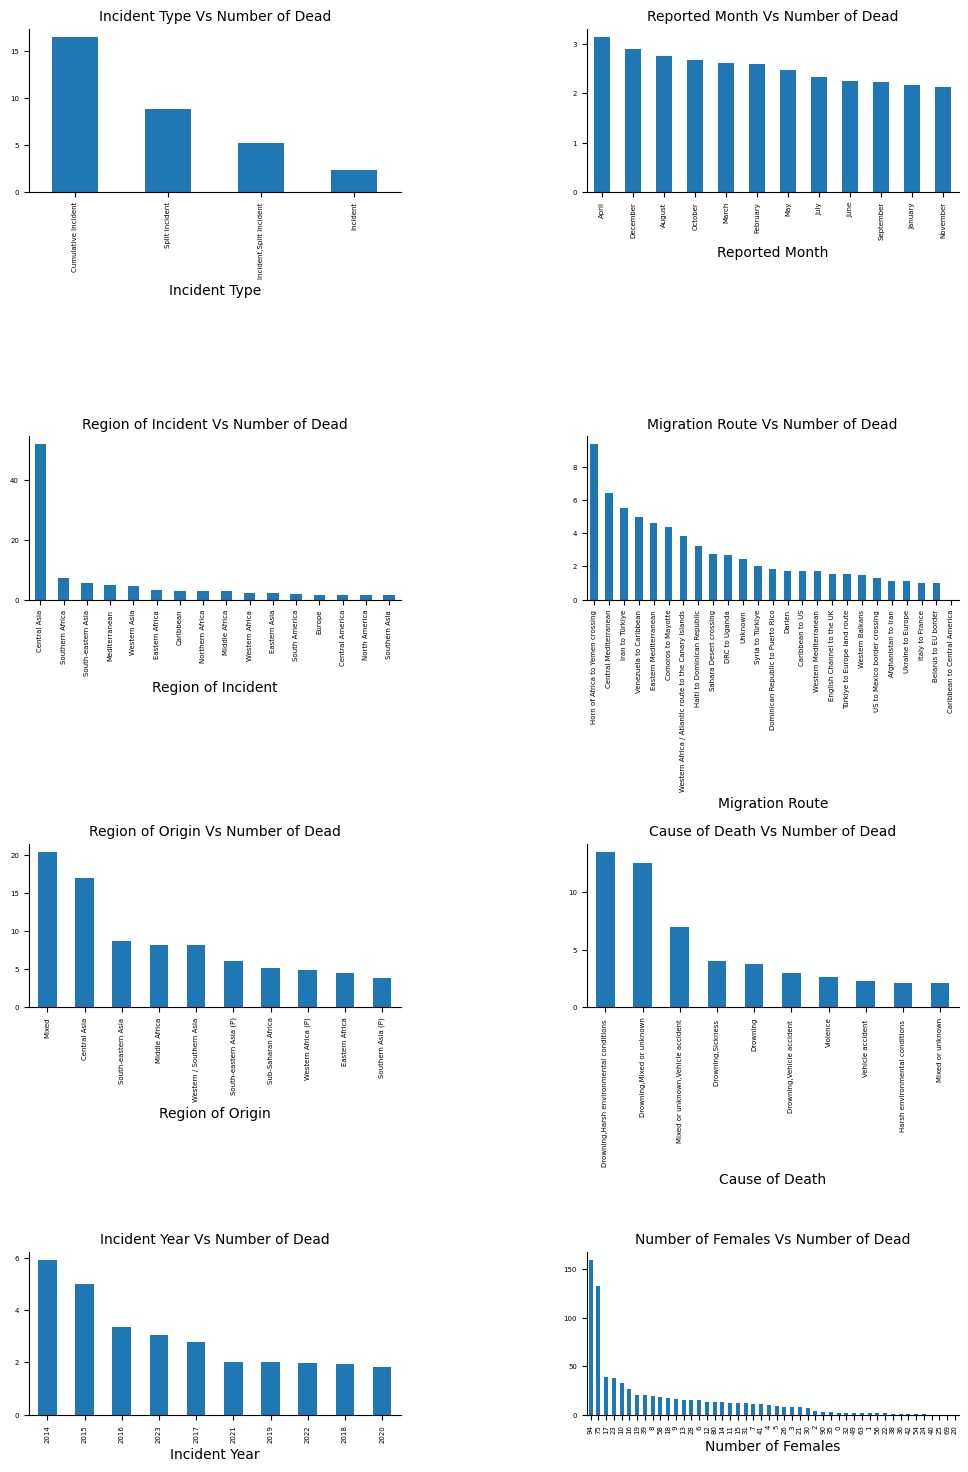

In [ ]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
Gmigrant.groupby('Incident Type')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=5)
axarr[0][0].set_title("Incident Type Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Reported Month')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=5)
axarr[0][1].set_title("Reported Month Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Region of Incident')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=5)
axarr[1][0].set_title("Region of Incident Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Migration Route')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=5)
axarr[1][1].set_title("Migration Route Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Region of Origin')['Number of Dead'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=5)
axarr[2][0].set_title("Region of Origin Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Cause of Death')['Number of Dead'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=5)
axarr[2][1].set_title("Cause of Death Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Incident Year')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=5)
axarr[3][0].set_title("Incident Year Vs Number of Dead", fontsize=10)
Gmigrant.groupby('Number of Females')['Number of Dead'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=5)
axarr[3][1].set_title("Number of Females Vs Number of Dead", fontsize=10)
plt.subplots_adjust(hspace=1.5)
plt.subplots_adjust(wspace=.5)
sns.despine()

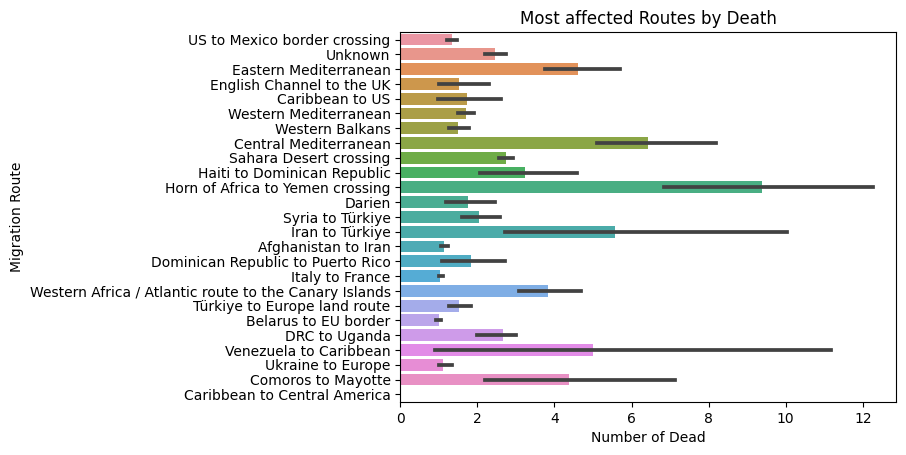

In [ ]:
sns.barplot(data= Gmigrant, x='Number of Dead',y= 'Migration Route')
plt.title('Most affected Routes by Death');

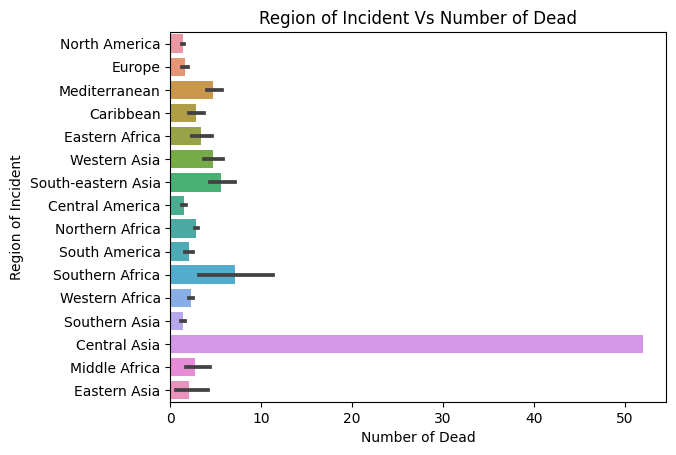

In [ ]:
sns.barplot(data= Gmigrant, x='Number of Dead',y= 'Region of Incident')
plt.title('Region of Incident Vs Number of Dead');

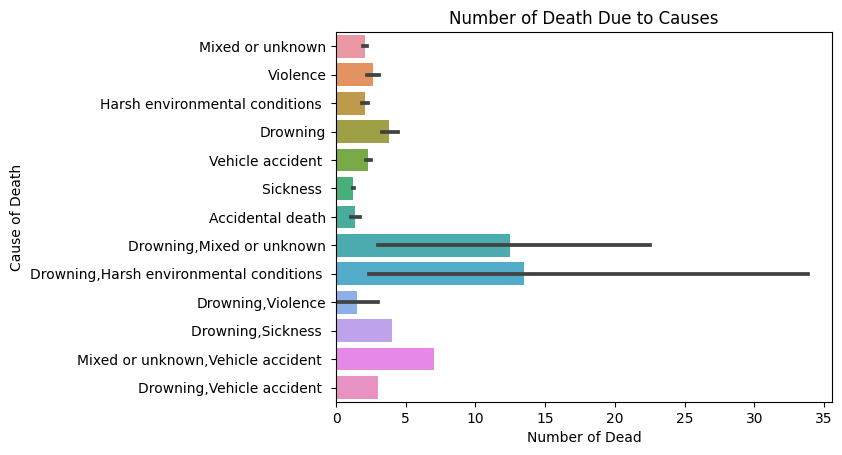

In [ ]:
sns.barplot(data= Gmigrant, x='Number of Dead',y= 'Cause of Death')
plt.title('Number of Death Due to Causes');

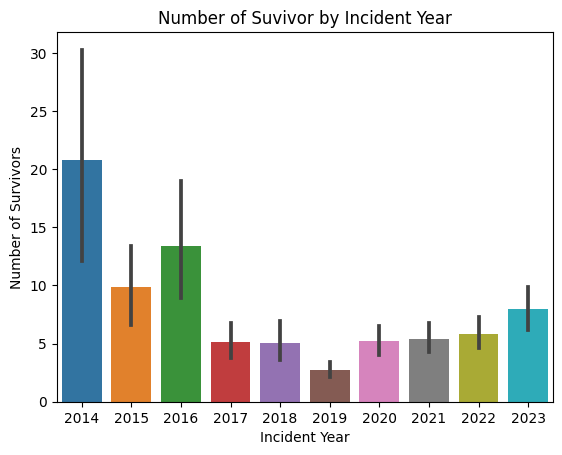

In [ ]:
sns.barplot(data= Gmigrant, x='Incident Year',y= 'Number of Survivors')
plt.title('Number of Suvivor by Incident Year');

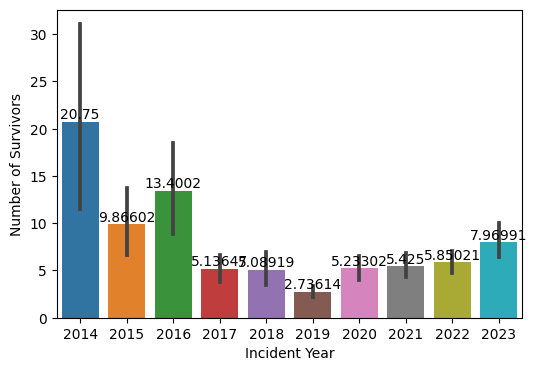

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=Gmigrant, x='Incident Year', y='Number of Survivors')
for bars in ax.containers:
    ax.bar_label(bars)

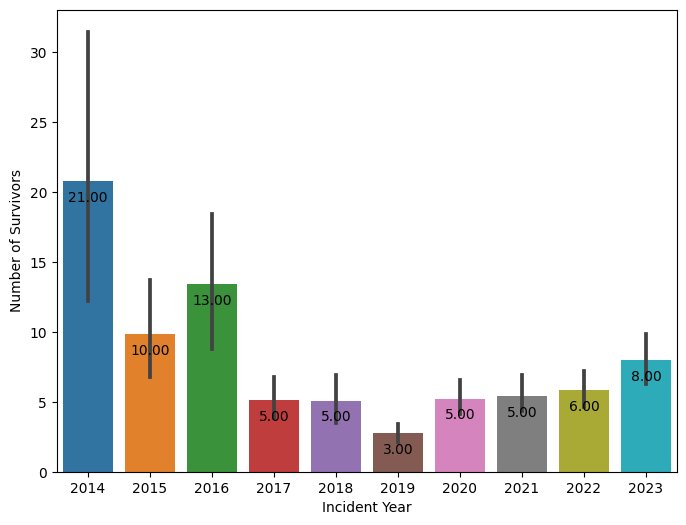

In [ ]:
#create horizontal barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=Gmigrant, x='Incident Year', y='Number of Survivors')

for v in ax.patches:
    ax.annotate(format(round(v.get_height()), '1.2f'),
                   (v.get_x() + v.get_width() / 2., v.get_height()),
                   ha='center', va='center',
                   xytext=(0, -12),
                   textcoords='offset points')

In [ ]:
# Accessing the heights from each rectangle
for c in ax.containers:
    for v in c:
        print(v.get_height().round(2))

20.75
9.87
13.4
5.14
5.09
2.74
5.23
5.42
5.85
7.97


In [ ]:
Gmigrant.corr()

,Incident Year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
Incident Year,1.000000,-0.070679,-0.055558,-0.077348,-0.044353,-0.015575,0.027849,-0.030011
Number of Dead,-0.070679,1.000000,0.208926,0.641773,0.094863,0.147181,0.199589,0.077084
Minimum Estimated Number of Missing,-0.055558,0.208926,1.000000,0.884053,0.131206,0.147635,0.172177,0.453512
Total Number of Dead and Missing,-0.077348,0.641773,0.884053,1.000000,0.148230,0.186118,0.230411,0.392485
Number of Survivors,-0.044353,0.094863,0.131206,0.148230,1.000000,0.029244,0.059640,0.024462
Number of Females,-0.015575,0.147181,0.147635,0.186118,0.029244,1.000000,0.217927,0.120186
Number of Males,0.027849,0.199589,0.172177,0.230411,0.059640,0.217927,1.000000,0.061169
Number of Children,-0.030011,0.077084,0.453512,0.392485,0.024462,0.120186,0.061169,1.000000


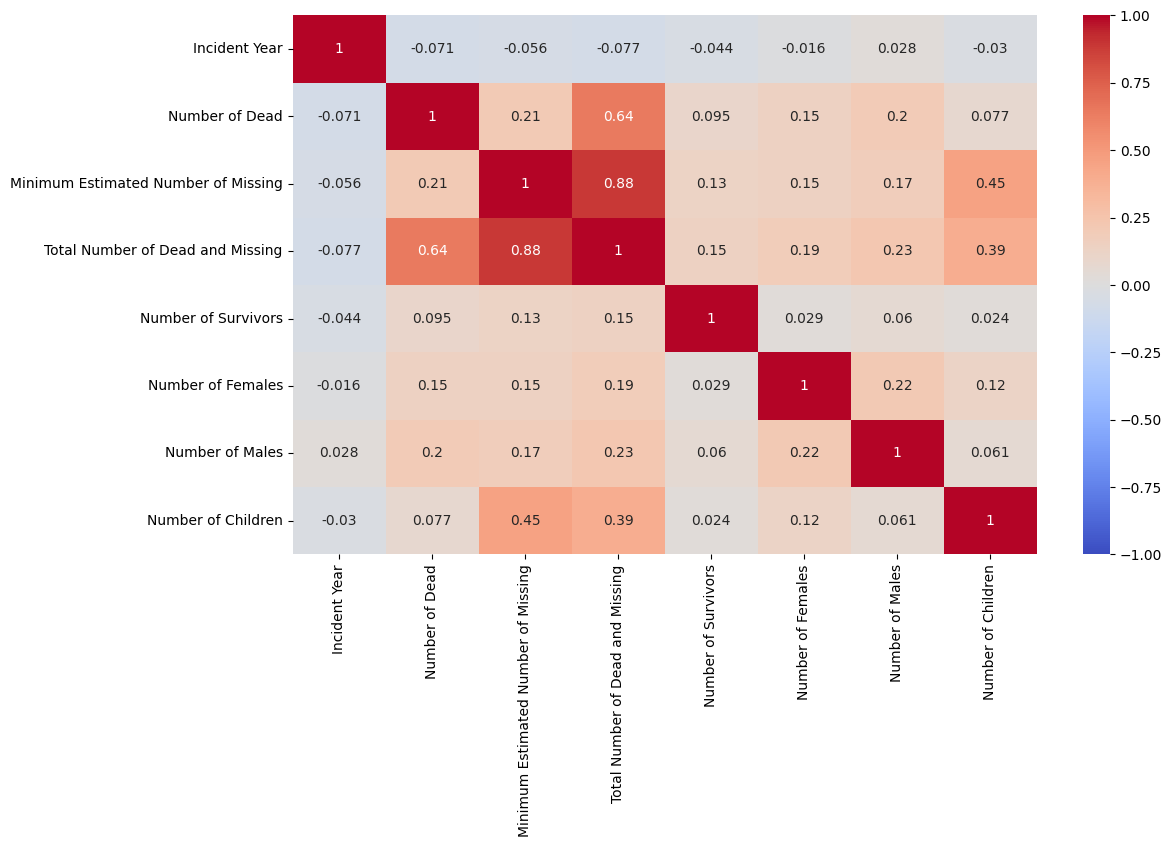

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(Gmigrant.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');
plt.show()

**From the Heat map, we can infer the following:**
- The minimum estimated number of missing migrant has a strong positive correlation to Total number of dead and missing 0.88. As the minimum estimated number of missing migrant increases; then the Total number of dead and missing will also increase.
- Total number of dead and missing also has a strong positive correlation to Number of dead 0.64
- There is a moderate correlation between minimum estimated number of missing migrant and Number of children with 0.45

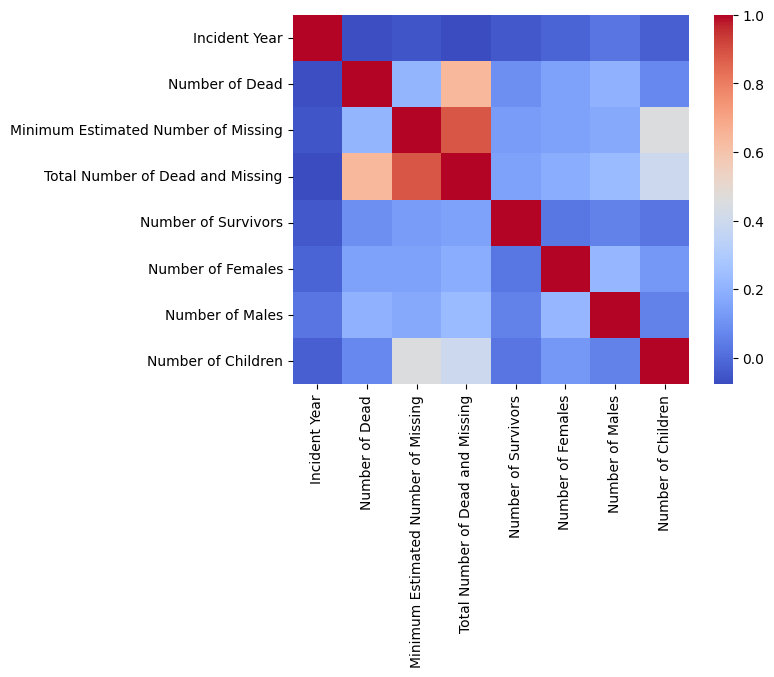

In [ ]:
sns.heatmap(Gmigrant.corr(), cmap = 'coolwarm');

## **Gender Distribution**

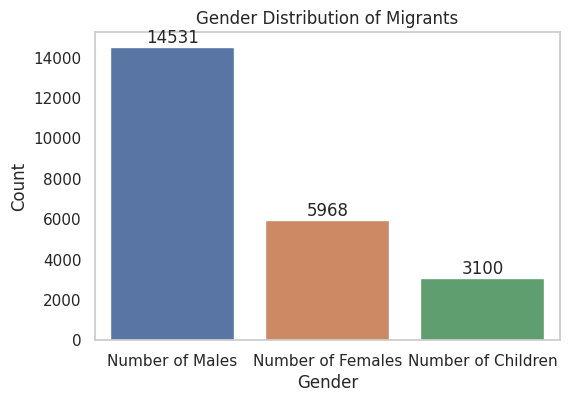

In [ ]:
gender_counts = Gmigrant[['Number of Males', 'Number of Females', 'Number of Children']].sum()

# Create a DataFrame for plotting
gender_df = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})

# Set the style
sns.set(style="whitegrid")

# Create a bar plot using Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Gender', y='Count', data=gender_df)
for bars in ax.containers:
    ax.bar_label(bars)

# Add title and labels
plt.title("Gender Distribution of Migrants")
plt.xlabel("Gender")
plt.ylabel("Count")
plt. grid(False)

# Show the plot
plt.show()

## **Time-Based Analysis: Monthly Trend**
To examine incidents over time in order to identify any temporal patterns or changes.

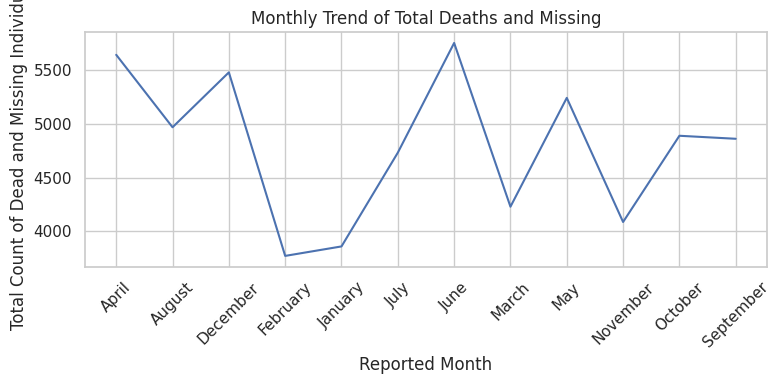

In [ ]:
# Group by 'Reported Month' and calculate the sum of 'Total Number of Dead and Missing'
monthly_trend = Gmigrant.groupby('Reported Month')['Total Number of Dead and Missing'].sum().reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(x='Reported Month', y='Total Number of Dead and Missing', data=monthly_trend)

# Add title and labels
plt.title('Monthly Trend of Total Deaths and Missing')
plt.xlabel('Reported Month')
plt.ylabel('Total Count of Dead and Missing Individuals')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout for better appearance
plt.show()


In [ ]:
category_cols = Gmigrant.select_dtypes(include=['object']).columns
numeric_cols = Gmigrant.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_cols)
print("Numerical Variables:")
print(numeric_cols)

Categorical Variables:
Index(['Incident Type', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Cause of Death',
       'Migration Route', 'Location of Death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')
Numerical Variables:
['Incident Year', 'Number of Dead', 'Minimum Estimated Number of Missing', 'Total Number of Dead and Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children']
